# Google Trends Data

Now that I have cleaned the data set and pulled out only the columns of interest (the five search terms), in this notebook I will go through the trends to find out more insights.

### Goals in this notebook:
Through this notebook and data analysis, I will strive to gain more knowledge of the following:
* Basic comparisons of popularity among the 5 Google trends results,
* Historical trends about the popularity,
* Any peaks in the data and the time frame for those peaks,
* Any correlations between these Google trends with that of depression rates in CA.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import timedelta

In [8]:
trends_df = pd.read_csv('../data/Cleaned/gtrends_CLEANED.csv',
                       parse_dates=True,
                     index_col='month')

In [9]:
trends_df

,anxiety,depression,sad,therapy,wellness
month,,,,,
2012-01-01,48,69,46,80,41
2012-02-01,55,81,46,89,44
2012-03-01,51,75,44,89,42
2012-04-01,50,73,43,89,39
2012-05-01,55,77,45,90,42
...,...,...,...,...,...
2018-08-01,95,74,76,99,57
2018-09-01,97,80,79,98,56
2018-10-01,100,95,81,99,55


In [10]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2012-01-01 to 2018-12-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   anxiety     84 non-null     int64
 1   depression  84 non-null     int64
 2   sad         84 non-null     int64
 3   therapy     84 non-null     int64
 4   wellness    84 non-null     int64
dtypes: int64(5)
memory usage: 3.9 KB


## What are the average, relative Google trends for my 5 words?

In [11]:
# Further inspect the data frame and describe the values for each column

trends_df.describe()

,anxiety,depression,sad,therapy,wellness
count,84.000000,84.0000,84.000000,84.000000,84.000000
mean,69.702381,78.0000,61.464286,88.952381,47.559524
std,13.915216,11.1117,10.547022,5.187810,8.326690
min,46.000000,54.0000,41.000000,77.000000,37.000000
25%,58.000000,70.0000,55.000000,85.000000,43.000000
50%,68.000000,79.0000,61.500000,89.000000,46.000000
75%,81.250000,85.2500,69.000000,92.250000,51.250000
max,100.000000,100.0000,85.000000,100.000000,100.000000


### Observations:

* Once again, we can compare among these words because each trend data has been compared to the same baseline which is 'drought.' 
* Throughout the 7 years (2012 to 2018), the popularity average for 'therapy' was highest at almost 89, whereas 'wellness' reported the lowest search interest at 47.6. 
* All of the words except 'sad' obtained the peak popularity when compared with 'drought,' as we can see by the max. number that is 100 for depression, anxiety, therapy, and wellness, but it is 85 for sad.

## What are the historical trends for the search interest in these words?
I want to look at any changes in the search interest and popularity for my 5 words, so I will make a plot to visually represent it:

Text(0.5, 1.0, 'Interest over time')

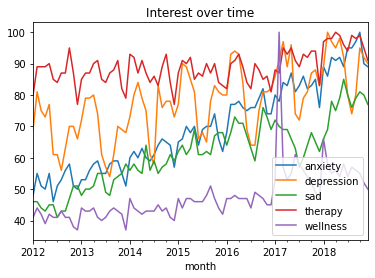

In [12]:
# To show a plot of the search trends and their comparisons among my 5 words:

trends_plot=trends_df.plot()

# Add a plot title

plt.title('Interest over time')

Text(0.5, 1.0, 'Interest over time')

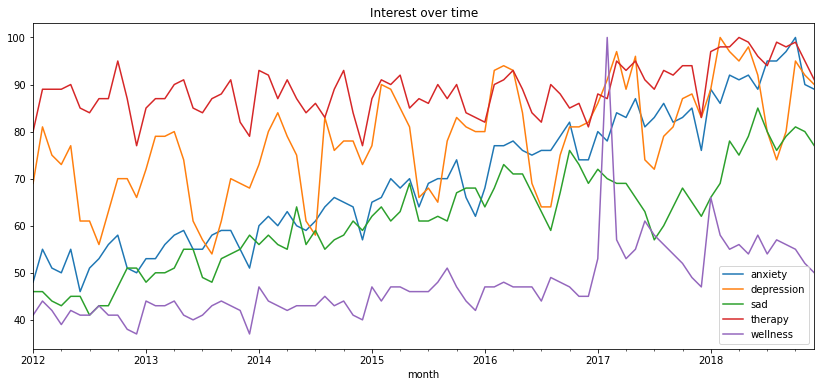

In [13]:
# To show more space between the years on the bottom axis:

trends_plot=trends_df.plot(figsize=(14,6))

# Again, add a plot title
plt.title('Interest over time')

### Observations:

* The most popular searches in CA were for the 'therapy' category (as we anticipated), shown by the red line that stays at the top of the plot for most of the years.
* The search trends for all 5 words have increased over the years, which we can tell by comparing the search interest in 2012 for each of the lines and seeing that they're at a lower point than where they end up in 2018 for each word.
* Interestingly, there is a big spike in the search interest for 'wellness' in 2017, so I'm wondering what might have caused that sudden increase in popularity?
* It looks like the search interest in 'anxiety,' shown by the orange line, increased the highest amount throughout the years.
* Is there a way for me to make this trend plot more digestible? Look into this going forward!

### Next Steps:

I want to keep probing into what this means for my data on adult depression rates. We know that search interest in depression- and mental health-related terms have increased, and that depression percentages have increased from 2012 to 2018. Where might I be able to find correlations? Can I connect this to overall interest in mental health that has increased, and how would I show that? 

I'm actually very curious about the big spike in searching for "wellness" towards the end of 2016, and I also want to look at seasonal changes Jan-Dec from 2012 to 2018 (maybe connecting to Seasonal Affective Disorder? irrespective of the fact that many places in CA don't really have seasons?)

For the 2016-2017 big spike, I could infer that this is probably connected to the election of Donald Trump in November 2016. Might be a big shocker and stress factor particularly in CA, being a democratic state. I can mention this in my data story!

### Observations: 

* Spikes near the beginning of each year, and huge spike for wellness at the start of 2017. Smoothing out the spikes by using the rolling() & mean() functions:

Text(0.5, 1.0, 'Interest over time')

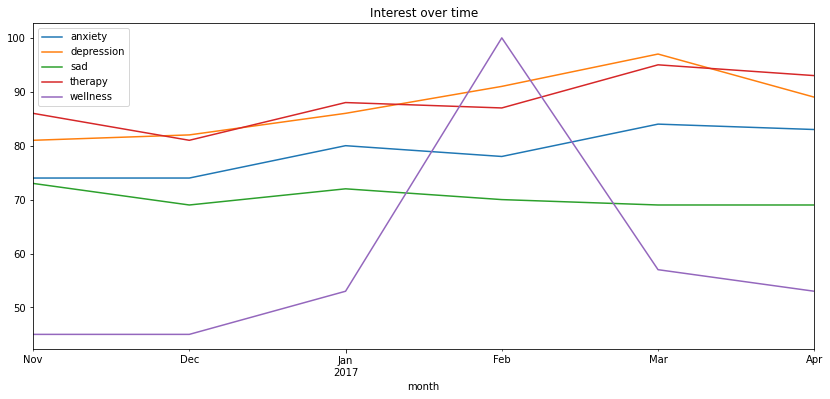

In [14]:
# Adding the .rolling method with a window of 1 month, taking the mean and plotting the results:

trends_df.loc['November 2016':'April 2017'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

Looking at potential seasonal changes from January to May:

Text(0.5, 1.0, 'Interest over time')

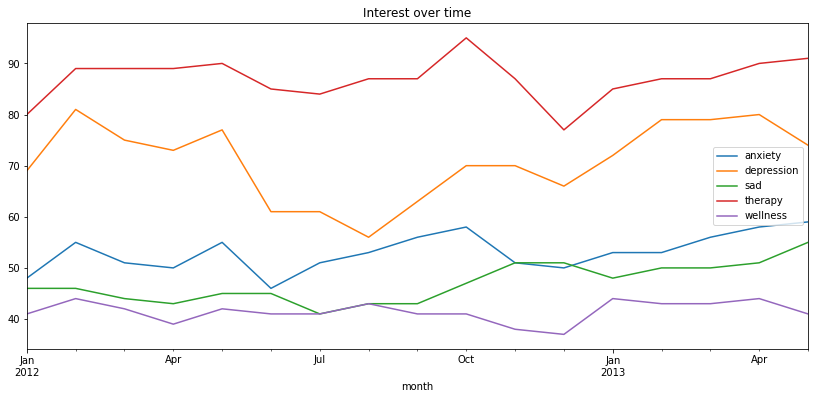

In [15]:
trends_df.loc['January 2012':'May 2013'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

Then looking further into seasonal changes, starting in the summer months of 2013 to spring of 2014:

Text(0.5, 1.0, 'Interest over time')

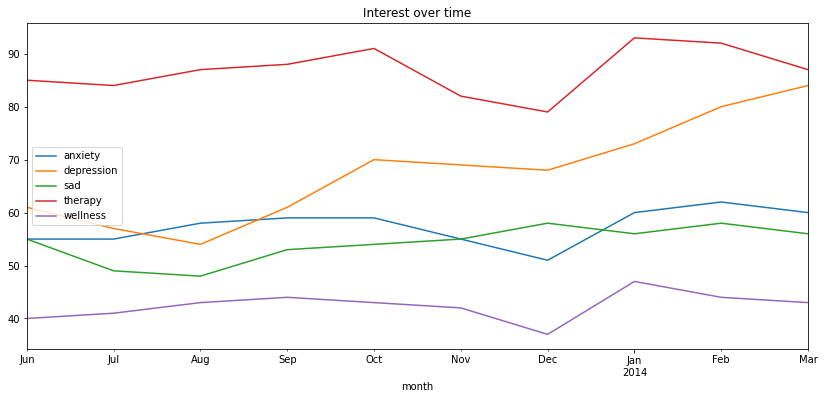

In [16]:
# Zooming into June through March:

trends_df.loc['June 2013':'March 2014'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

### Observations: 

* Generally decreasing search popularity in November and December, before increasing in January

* Also sometimes decreasing during a lot of the summer months!

Text(0.5, 1.0, 'Interest over time')

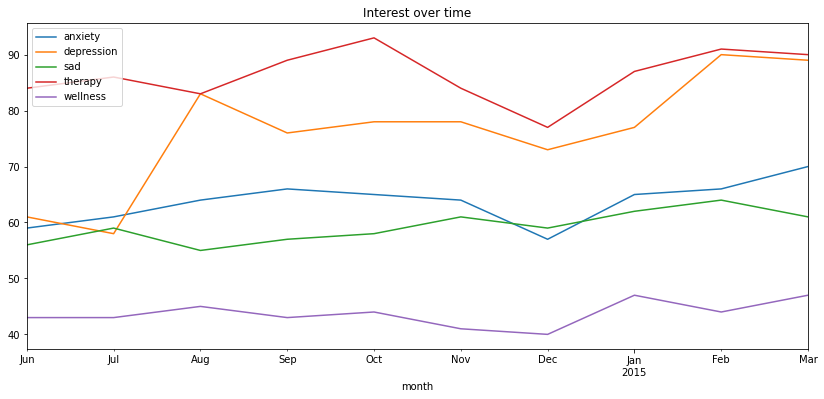

In [17]:
# Looking again at June through March, in the next year's (2014 to 2015) time frame:

trends_df.loc['June 2014':'March 2015'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

Again, we see some fluctuations, but the search interest sort of increases starting December and heading into the new year; stress from New Year's resolutions? Interesting stuff!

Text(0.5, 1.0, 'Interest over time')

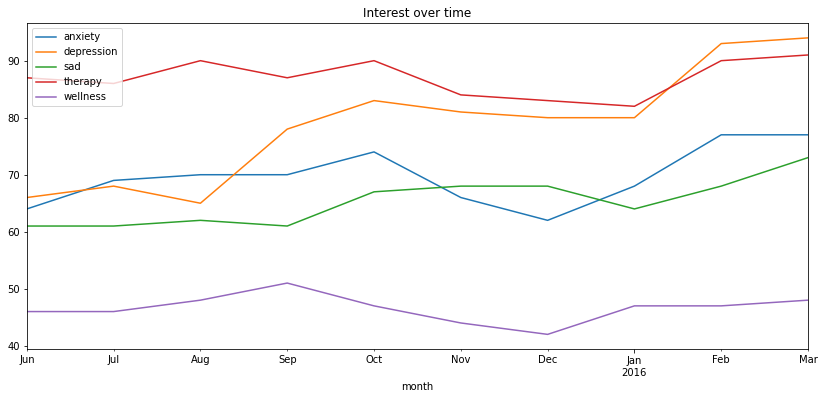

In [18]:
# Looking at the same seasonal trends, June through March in the following year, 2015 to 2016:

trends_df.loc['June 2015':'March 2016'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

Again, the same increase towards the end of the year in search interest! So interesting.

One last time with the next time period:

Text(0.5, 1.0, 'Interest over time')

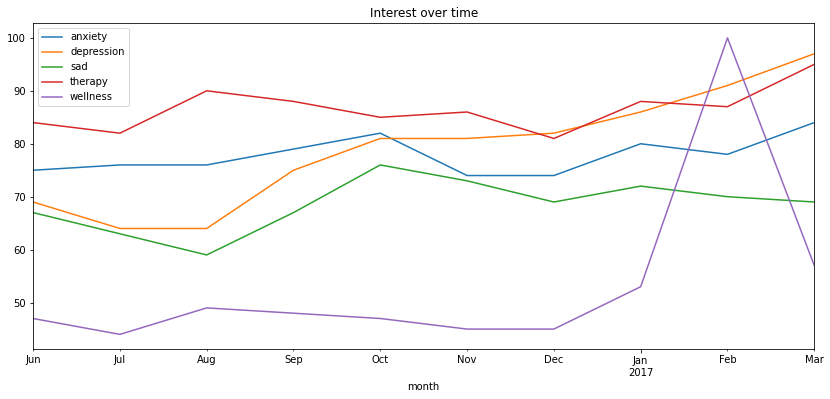

In [19]:
# Zooming into June through March again, for 2016 and 2017:

trends_df.loc['June 2016':'March 2017'].rolling(window=1).mean().plot(figsize=(14,6))
plt.title('Interest over time')

Increases at the end of 2016 and into 2017!!! Note that huge spike in early months of 2017 for "wellness." I will refer to this specifically in my data story, and explain the potential connection to the Presidential Election.

## Where to go from here?

Well, Google Trends are really effective for very broad and general understanding of what people might be curious about in certain time frames.

This would be an awesome way to introduce my data story, but I'm going to end the analysis here. I will use what I've learned, that there has been an overall increase in searching about mental health-related topics online, reflecting people's curiosity in this subject matter. I will also point to interesting patterns! 

In sum, the Google Trends data analysis will be my method to segue into the main topic of Adult Depression rates in CA.

Now let's move onto the other analysis notebooks! Onto Adult Depression rates!